In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline

**bold text**# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_train.shape


(389, 32)

In [ ]:
df_test.shape

(180, 31)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       389 non-null    int64  
 1   diagnosis                389 non-null    object 
 2   radius_mean              389 non-null    float64
 3   texture_mean             389 non-null    float64
 4   perimeter_mean           389 non-null    float64
 5   area_mean                389 non-null    float64
 6   smoothness_mean          389 non-null    float64
 7   compactness_mean         389 non-null    float64
 8   concavity_mean           389 non-null    float64
 9   concave points_mean      389 non-null    float64
 10  symmetry_mean            389 non-null    float64
 11  fractal_dimension_mean   389 non-null    float64
 12  radius_se                389 non-null    float64
 13  texture_se               389 non-null    float64
 14  perimeter_se             3

In [ ]:
col = df_train.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_train['diagnosis'].value_counts()

B    219
M    170
Name: diagnosis, dtype: int64

In [ ]:
df_train['diagnosis'] = df_train['diagnosis'].map({'M' : 1, 'B' : 0})

In [ ]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Check null values
df_train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Identify categorical and numerical columns

categorical_cols = [col for col in df_train.columns if df_train[col].dtype == 'O']
numerical_cols = [col for col in df_train.columns if df_train[col].dtype != 'O']

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")



Categorical columns: []
Numerical columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
#Define target variable

target = 'diagnosis'


## Exploratory Data Analysis



In [ ]:
#Generate summary statistics
df_train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,389.0,2.703005e+07,1.111087e+08,8670.000000,862965.000000,891703.000000,8.812877e+06,9.010343e+08
diagnosis,389.0,4.370180e-01,4.966562e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,389.0,1.433808e+01,3.573300e+00,6.981000,11.810000,13.500000,1.626000e+01,2.811000e+01
texture_mean,389.0,1.898018e+01,4.146792e+00,9.710000,15.900000,18.660000,2.158000e+01,3.928000e+01
perimeter_mean,389.0,9.343784e+01,2.461272e+01,43.790000,75.710000,87.210000,1.081000e+02,1.885000e+02
area_mean,389.0,6.747398e+02,3.574602e+02,143.500000,428.900000,562.100000,8.177000e+02,2.499000e+03
smoothness_mean,389.0,9.690951e-02,1.394563e-02,0.062510,0.086940,0.096760,1.062000e-01,1.447000e-01
compactness_mean,389.0,1.069978e-01,5.512219e-02,0.019380,0.066360,0.095800,1.336000e-01,3.454000e-01
concavity_mean,389.0,9.432745e-02,8.202390e-02,0.000000,0.030360,0.069500,1.379000e-01,4.268000e-01
concave points_mean,389.0,5.190124e-02,3.979646e-02,0.000000,0.020740,0.037800,7.944000e-02,2.012000e-01


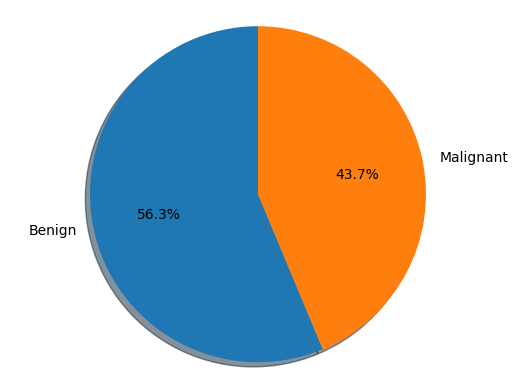

In [ ]:
## Create a pie chart using the value counts of the 'diagnosis' column
# Check the value counts of 'diagnosis' column
value_counts = df_train.diagnosis.value_counts()

# Confirm that labels match the number of unique values in 'diagnosis'
labels ="Benign","Malignant"

# Create the pie chart
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(value_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()



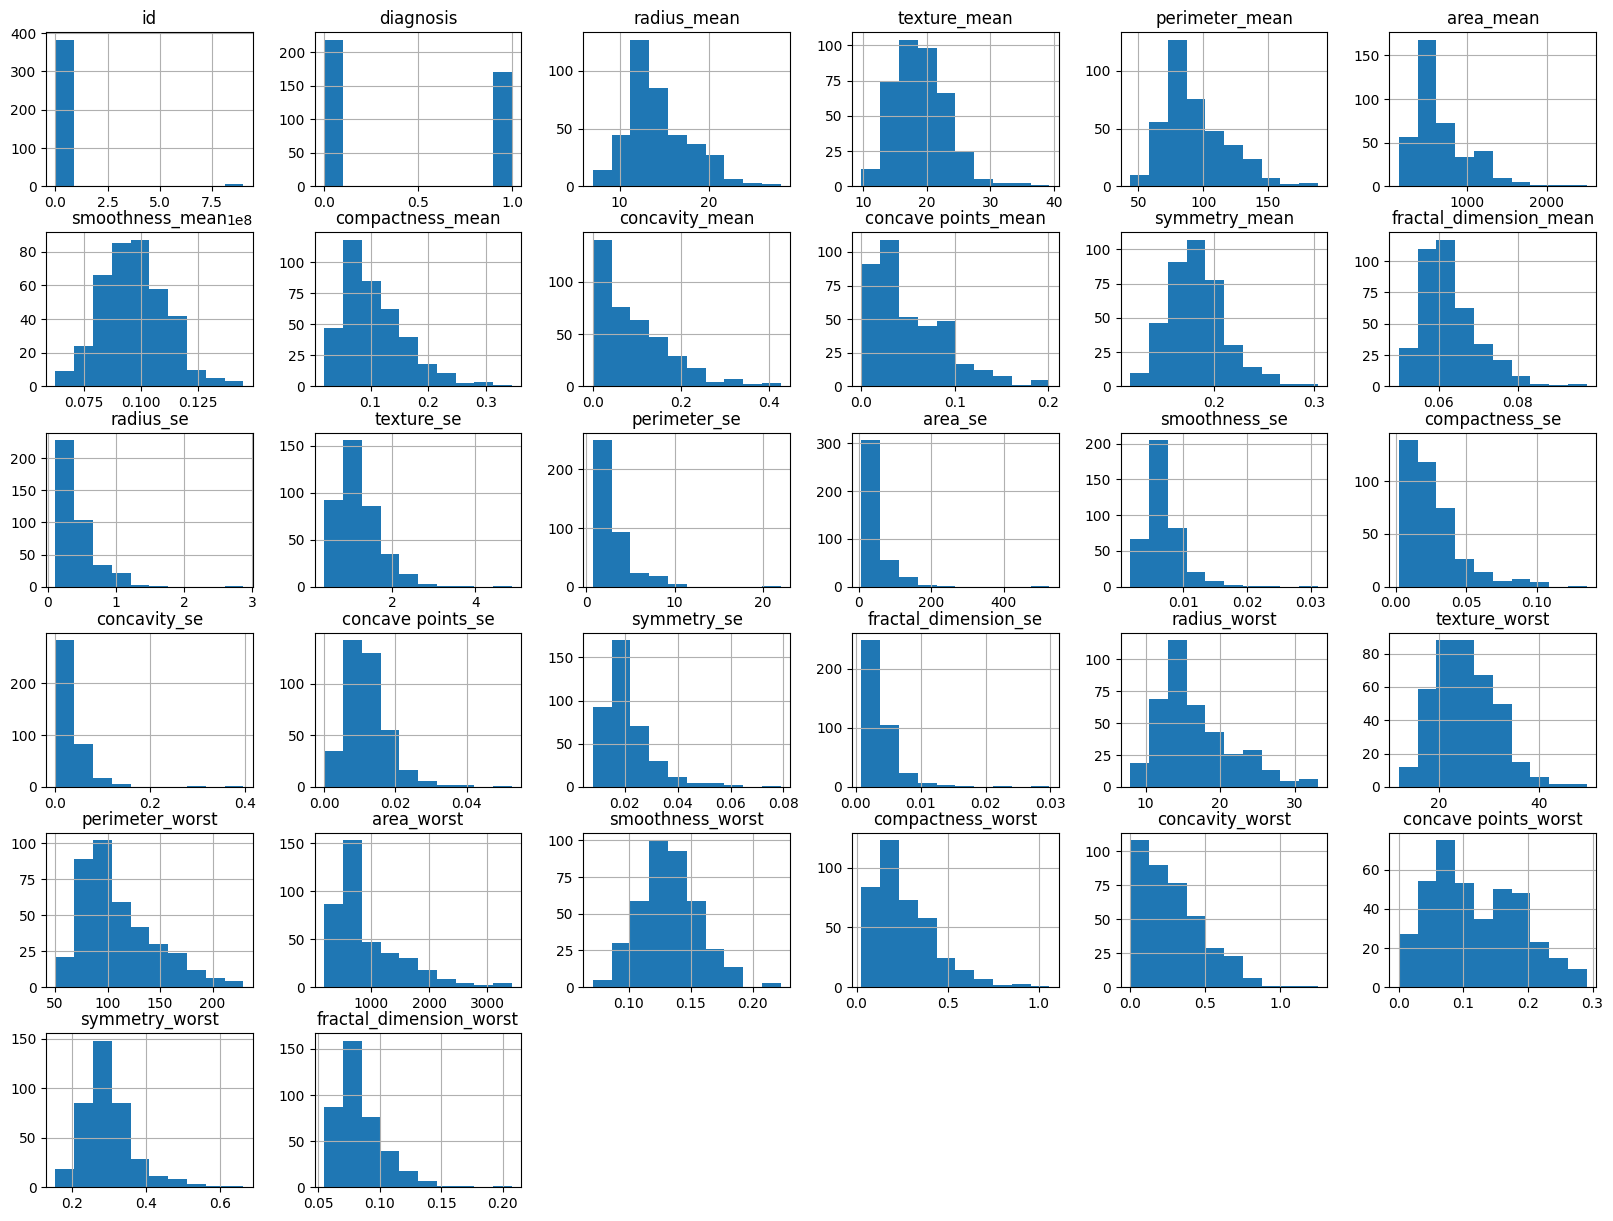

In [ ]:
# Create histograms for the numerical columns
num_bins=10
df_train.hist(bins=num_bins,figsize=(20,15))
plt.show()

In [ ]:
# Analysis of Target Variable with Numerical Variables

def target_summary_with_numerical_data(dataframe, target, numerical_col):
    """
    It gives the summary of specified numerical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved.
        numerical_col (string): The numerical column names are to be retrieved.
    """
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [ ]:
for col in numerical_cols:
    target_summary_with_numerical_data(df_train, target ,col)

                     id
diagnosis              
0          2.804314e+07
1          2.572496e+07


           diagnosis
diagnosis           
0                0.0
1                1.0


           radius_mean
diagnosis             
0            12.080982
1            17.245765


           texture_mean
diagnosis              
0             17.138356
1             21.352882


           perimeter_mean
diagnosis                
0               77.606804
1              113.831941


            area_mean
diagnosis            
0          457.526484
1          954.561765


           smoothness_mean
diagnosis                 
0                 0.092232
1                 0.102936


           compactness_mean
diagnosis                  
0                  0.078125
1                  0.144193


           concavity_mean
diagnosis                
0                0.046565
1                0.155857


           concave points_mean
diagnosis                     
0                     0.025258
1    

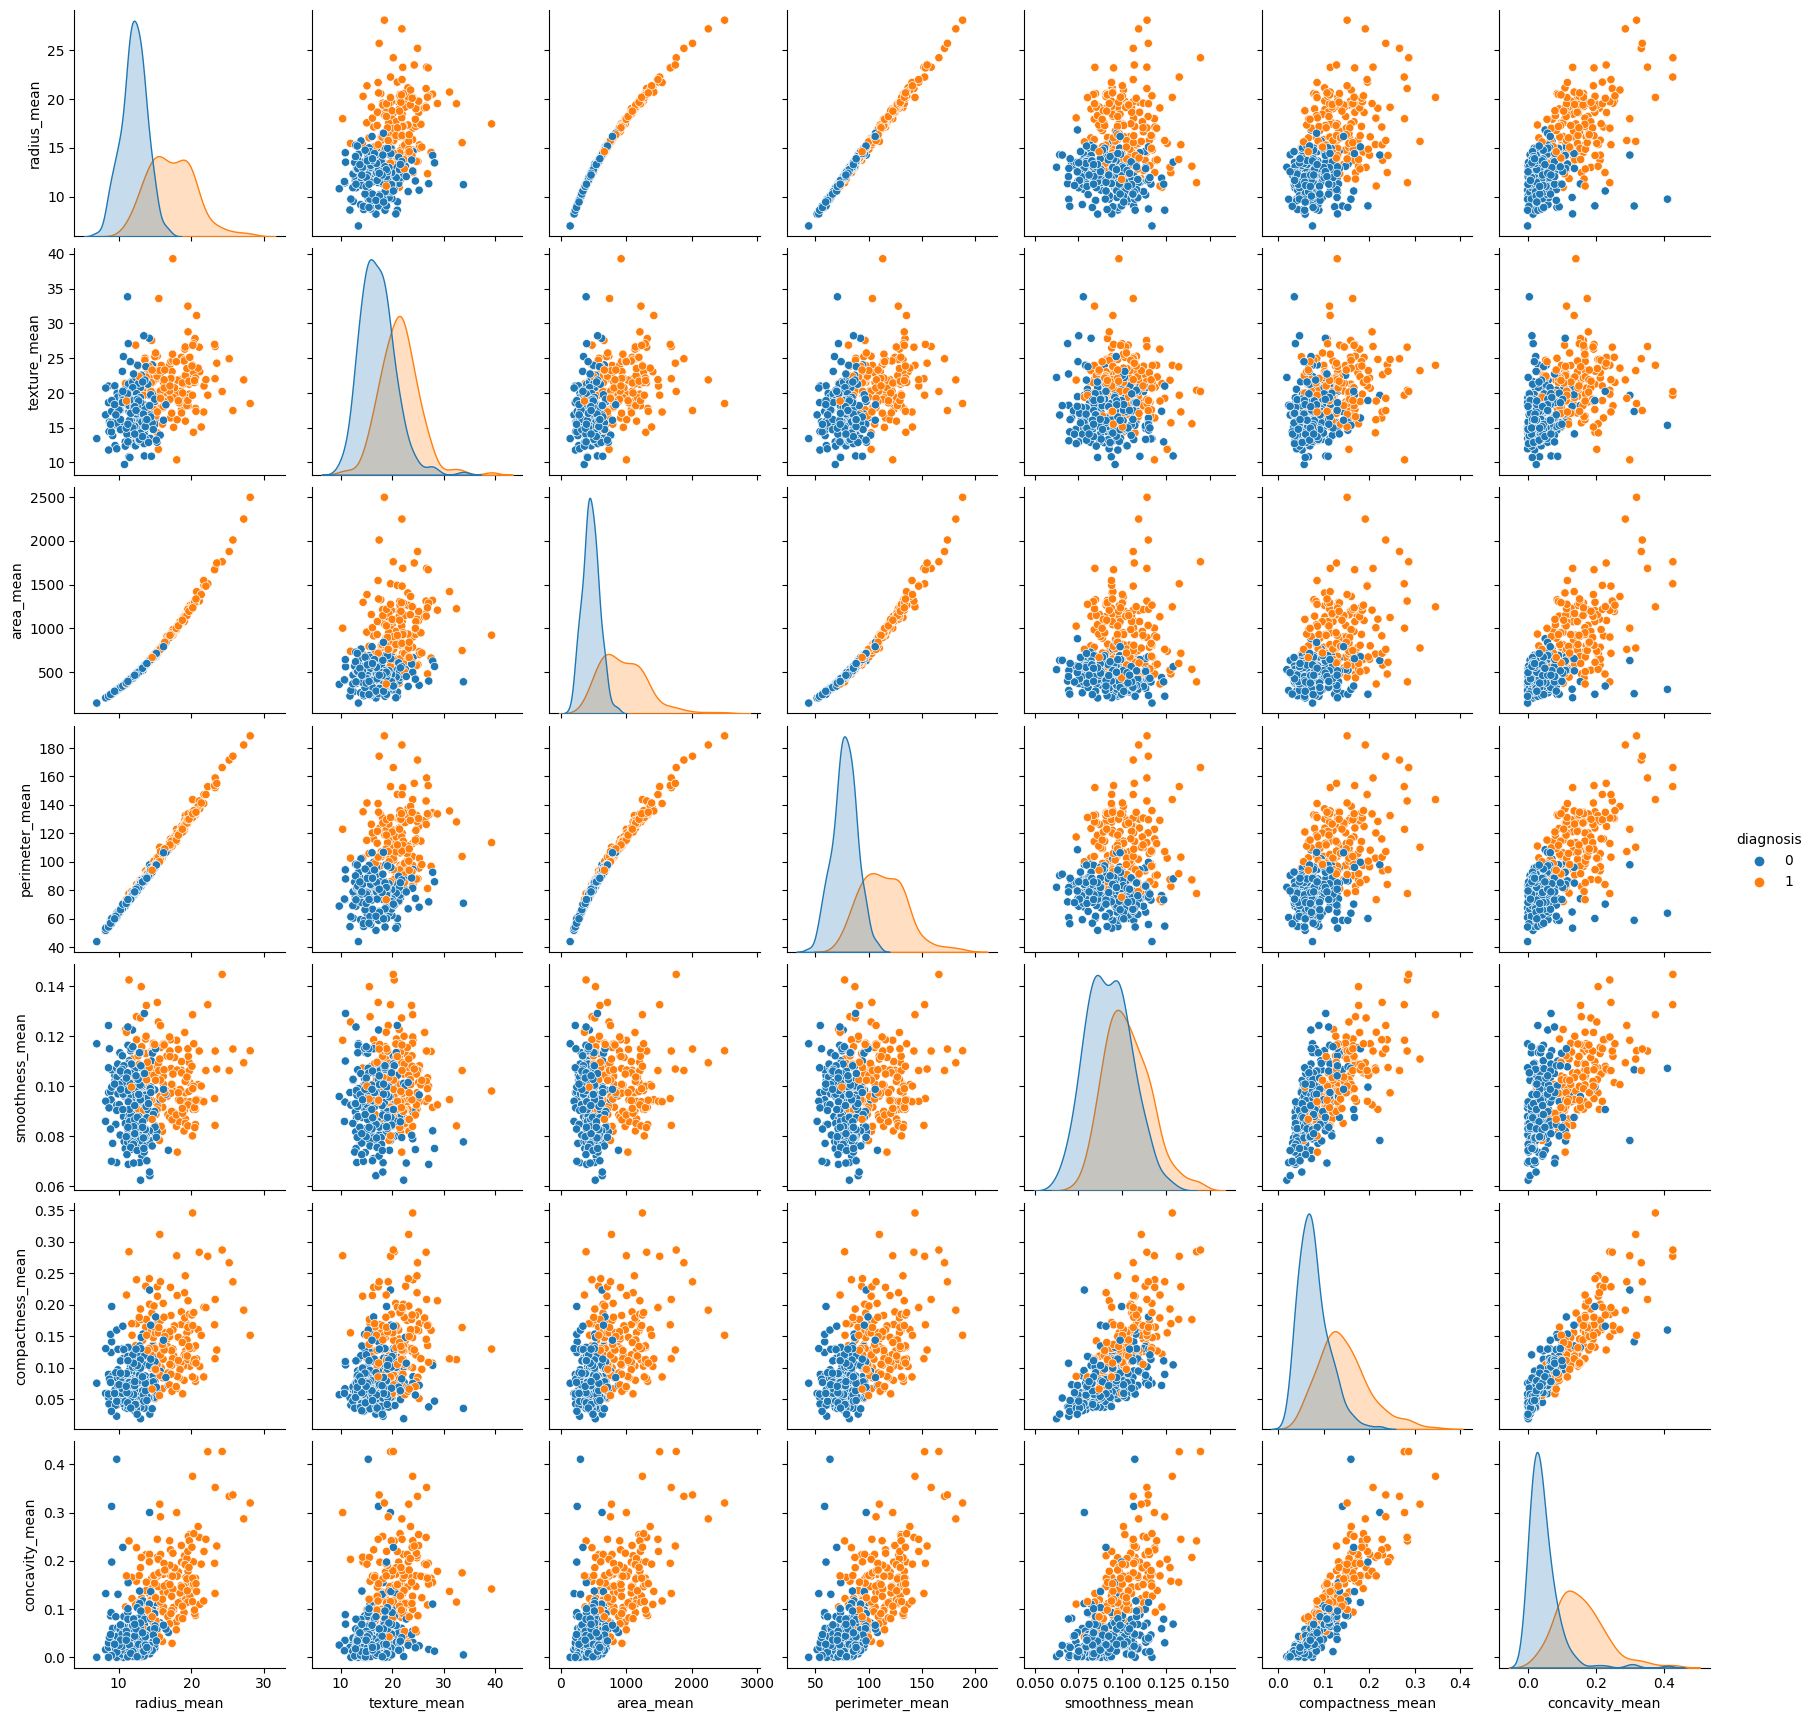

In [ ]:
#Create a pair plot

sns.pairplot(df_train,hue="diagnosis", vars=["radius_mean", "texture_mean", "area_mean", "perimeter_mean", "smoothness_mean", "compactness_mean","concavity_mean"])

# Feature Selection

<Axes: >

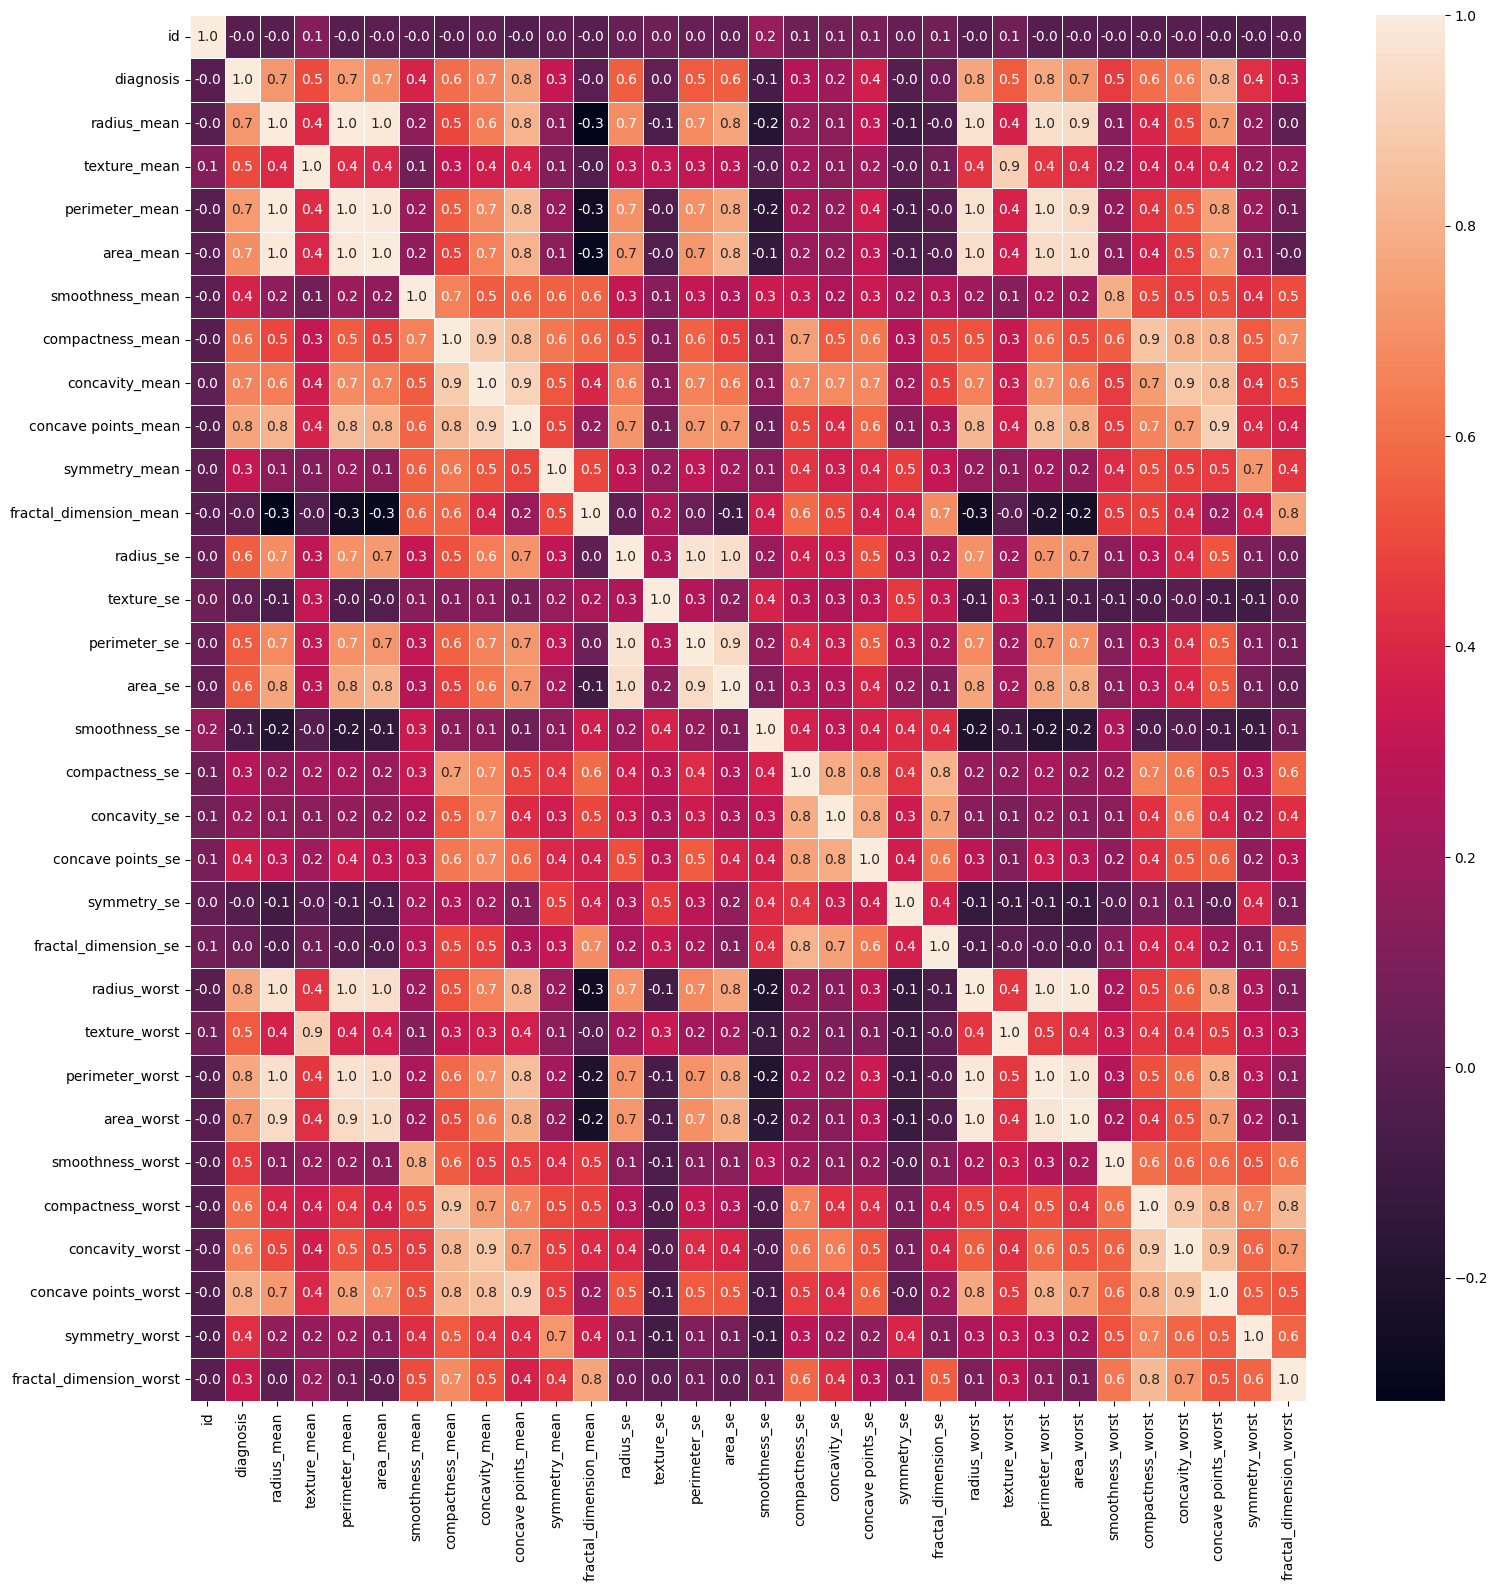

In [ ]:
#Correlation heat map

f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() #set of the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold :
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df_train, 0.9)
len(set(corr_features))


10

In [ ]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

Feature Selection Based on Correlations:
Highly Correlated Features: Radius, Perimeter, and Area
Features: 'radius_mean,' 'perimeter_mean,' and 'area_mean'

Action: Keep only 'area_mean' due to high correlation among the three.

Highly Correlated Features: Compactness, Concavity, and Concave Points (Mean)
Features: 'compactness_mean,' 'concavity_mean,' and 'concave points_mean'

Action: Retain 'concavity_mean' for its effectiveness in representing the information.

Highly Correlated Features: Radius, Perimeter, and Area (SE - Standard Error)
Features: 'radius_se,' 'perimeter_se,' and 'area_se'

Action: Keep only 'area_se' for simplification.

Highly Correlated Features: Radius, Perimeter, and Area (Worst)
Features: 'radius_worst,' 'perimeter_worst,' and 'area_worst'

Action: Use 'area_worst' as it captures the desired information.

Highly Correlated Features: Compactness, Concavity, and Concave Points (Worst)
Features: 'compactness_worst,' 'concavity_worst,' and 'concave points_worst'

Action: Retain 'concavity_worst' for simplification.

Highly Correlated Features: Compactness, Concavity, and Concave Points (SE - Standard Error)
Features: 'compactness_se,' 'concavity_se,' and 'concave points_se'

Action: Choose 'concavity_se' as a representative feature.

Highly Correlated Features: Texture (Mean and Worst)
Features: 'texture_mean' and 'texture_worst'

Action: Utilize 'texture_mean' for capturing relevant information.

Highly Correlated Features: Area (Worst and Mean)
Features: 'area_worst' and 'area_mean'

Action: Use 'area_mean' to represent the information effectively.

This structured approach to feature selection based on correlations helps streamline the dataset, reduce dimensionality, and improve model interpretability while maintaining the most relevant information for analysis or modeling purposes.

In [ ]:
# Perform ANOVA test for each numerical feature
for feature in numerical_cols:
    group1 = df_train[df_train['diagnosis'] == 0][feature]
    group2 = df_train[df_train['diagnosis'] == 1][feature]
    f_statistic, p_value = f_oneway(group1, group2)
    print(f"For {feature}:")
    print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.2e}\n")

For id:
F-statistic: 0.04, p-value: 8.39e-01

For diagnosis:
F-statistic: inf, p-value: 0.00e+00

For radius_mean:
F-statistic: 411.46, p-value: 7.70e-63

For texture_mean:
F-statistic: 132.32, p-value: 1.54e-26

For perimeter_mean:
F-statistic: 444.07, p-value: 3.28e-66

For area_mean:
F-statistic: 352.83, p-value: 2.06e-56

For smoothness_mean:
F-statistic: 65.81, p-value: 6.66e-15

For compactness_mean:
F-statistic: 212.41, p-value: 1.16e-38

For concavity_mean:
F-statistic: 301.52, p-value: 2.35e-50

For concave points_mean:
F-statistic: 532.02, p-value: 1.11e-74

For symmetry_mean:
F-statistic: 45.27, p-value: 6.20e-11

For fractal_dimension_mean:
F-statistic: 0.01, p-value: 9.30e-01

For radius_se:
F-statistic: 174.07, p-value: 4.43e-33

For texture_se:
F-statistic: 0.06, p-value: 8.07e-01

For perimeter_se:
F-statistic: 163.61, p-value: 1.73e-31

For area_se:
F-statistic: 171.09, p-value: 1.25e-32

For smoothness_se:
F-statistic: 1.78, p-value: 1.82e-01

For compactness_se:
F-st

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
df_train1 = df_train.copy()
drop_list1 = ["radius_mean","perimeter_mean","compactness_mean","concave points_mean","radius_se",
             "perimeter_se","radius_worst","perimeter_worst","compactness_worst","concave points_worst",
             "texture_worst","area_worst", "compactness_se","concave points_se"]
df_train1 = df_train.drop(drop_list1,axis = 1 )        # do not modify train_df, we will use it later
df_train1.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,84348301,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,84358402,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

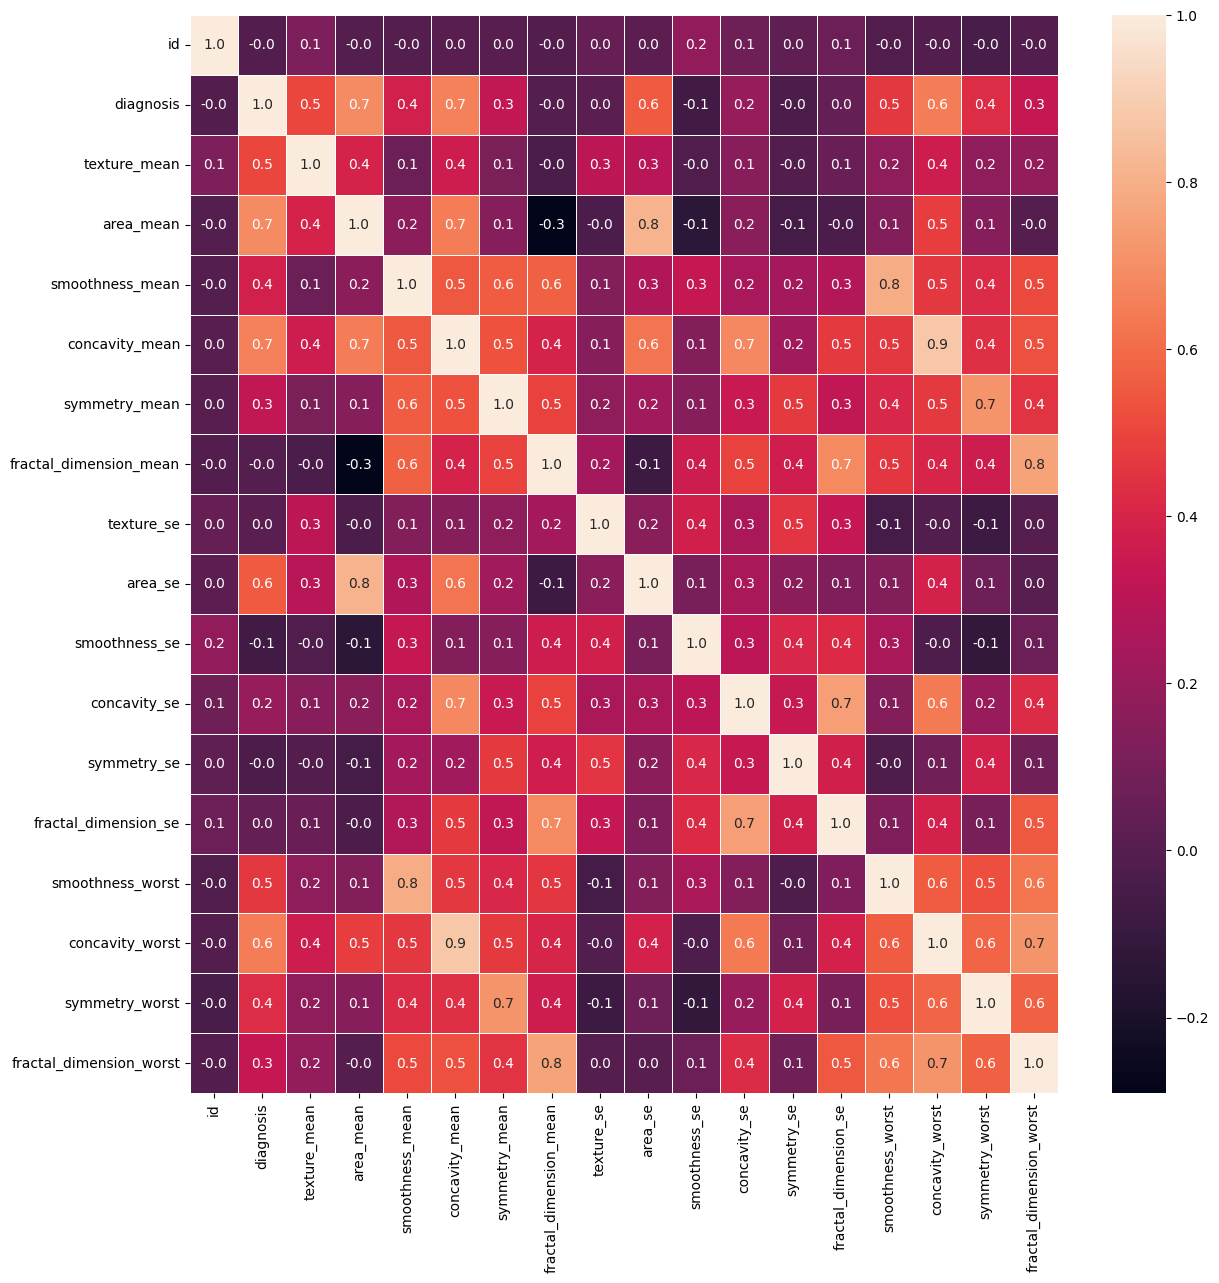

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_train1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# **Modelling**

Data Preprocessing

In [ ]:
# counts of unique rows in the 'diagnosis' column
df_train1['diagnosis'].value_counts()

0    219
1    170
Name: diagnosis, dtype: int64

Splitting the data into train and test

In [ ]:
#define independent (X) variable
X = df_train1.drop(['diagnosis'], axis = 1)
X.head()

,id,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [ ]:
#define dependent (y) variable

y = df_train1['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
# split data into train 70% and test 30%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Establish baseline accuracy

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, y_test
# X_train: Training features, y_train: Training labels
# X_test: Test features, y_test: Test labels

# Create a DummyClassifier that predicts the majority class
baseline_classifier = DummyClassifier(strategy="most_frequent")

# Fit the baseline model
baseline_classifier.fit(X_train, y_train)

# Make predictions
baseline_predictions = baseline_classifier.predict(X_test)

# Calculate the baseline accuracy
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.5128205128205128


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Logistic Regression

Accuracy: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.97      0.98      0.97        57

    accuracy                           0.97       117
   macro avg       0.97      0.97      0.97       117
weighted avg       0.97      0.97      0.97       117

Confusion Matrix:
 [[58  2]
 [ 1 56]]


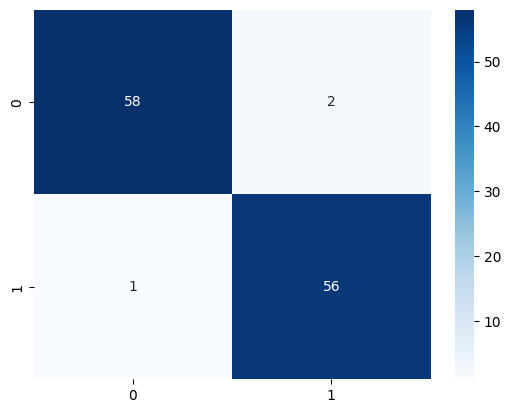

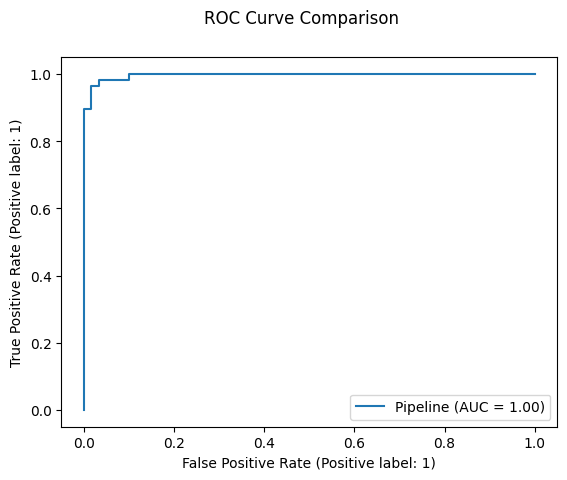

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

# Create a logistic regression classifier with balanced class weights
log_clf = LogisticRegression(random_state=42, class_weight='balanced')

# Fit the model (including preprocessing) to your training data
log_clf.fit(X_train, y_train)


# Create a pipeline for preprocessing and logistic regression
from sklearn.pipeline import make_pipeline
pipe1 = make_pipeline(sc, log_clf)

# Fit the model (including preprocessing) to your training data
pipe1.fit(X_train, y_train)

# Make predictions on new data
y_pred = pipe1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix,cmap = 'Blues', annot=True)


# Create ROC curve display for the logistic regression classifier
logistic_disp = RocCurveDisplay.from_estimator(pipe1, X_test, y_test)

# Set labels for the classifier
logistic_disp.figure_.suptitle("ROC Curve Comparison")
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Feature Importance
log_reg = pipe1.named_steps['logisticregression']
coefficients = log_reg.coef_[0]
feature_names = X_train.columns


# Feature Importance
log_reg = pipe1.named_steps['logisticregression']
coefficients = log_reg.coef_[0]
feature_names = X_train.columns


### For class "0" (benign), the model has a high precision of 0.98, which means that when it predicts a tumor as benign, it is correct 98% of the time. The recall of 0.93 means that the model correctly identifies 93% of actual benign cases. The F1-score, which is the harmonic mean of precision and recall, is 0.96, indicating a good balance between precision and recall for class "0."

### For class "1" (malignant), the model also has a high precision of 0.93, indicating that when it predicts a tumor as malignant, it is correct 93% of the time. The recall of 0.98 means that the model correctly identifies 98% of actual malignant cases. The F1-score for class "1" is also 0.96, indicating a good balance between precision and recall for class "1."

## Random Forest

In [ ]:
# Define the hyperparameter grid to search over
param_grid_rfc = {'n_estimators': [10, 50, 100, 500], 'max_depth': [5, 10, 20, 50]}

# Create the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)
grid_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_rfc.best_params_)

# Use the best hyperparameters to create a new random forest classifier
best_rfc = RandomForestClassifier(n_estimators=grid_search_rfc.best_params_['n_estimators'],
                                   max_depth=grid_search_rfc.best_params_['max_depth'],
                                   random_state=42)

# Train the model on the training data
best_rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 500}
Accuracy: 97.44%


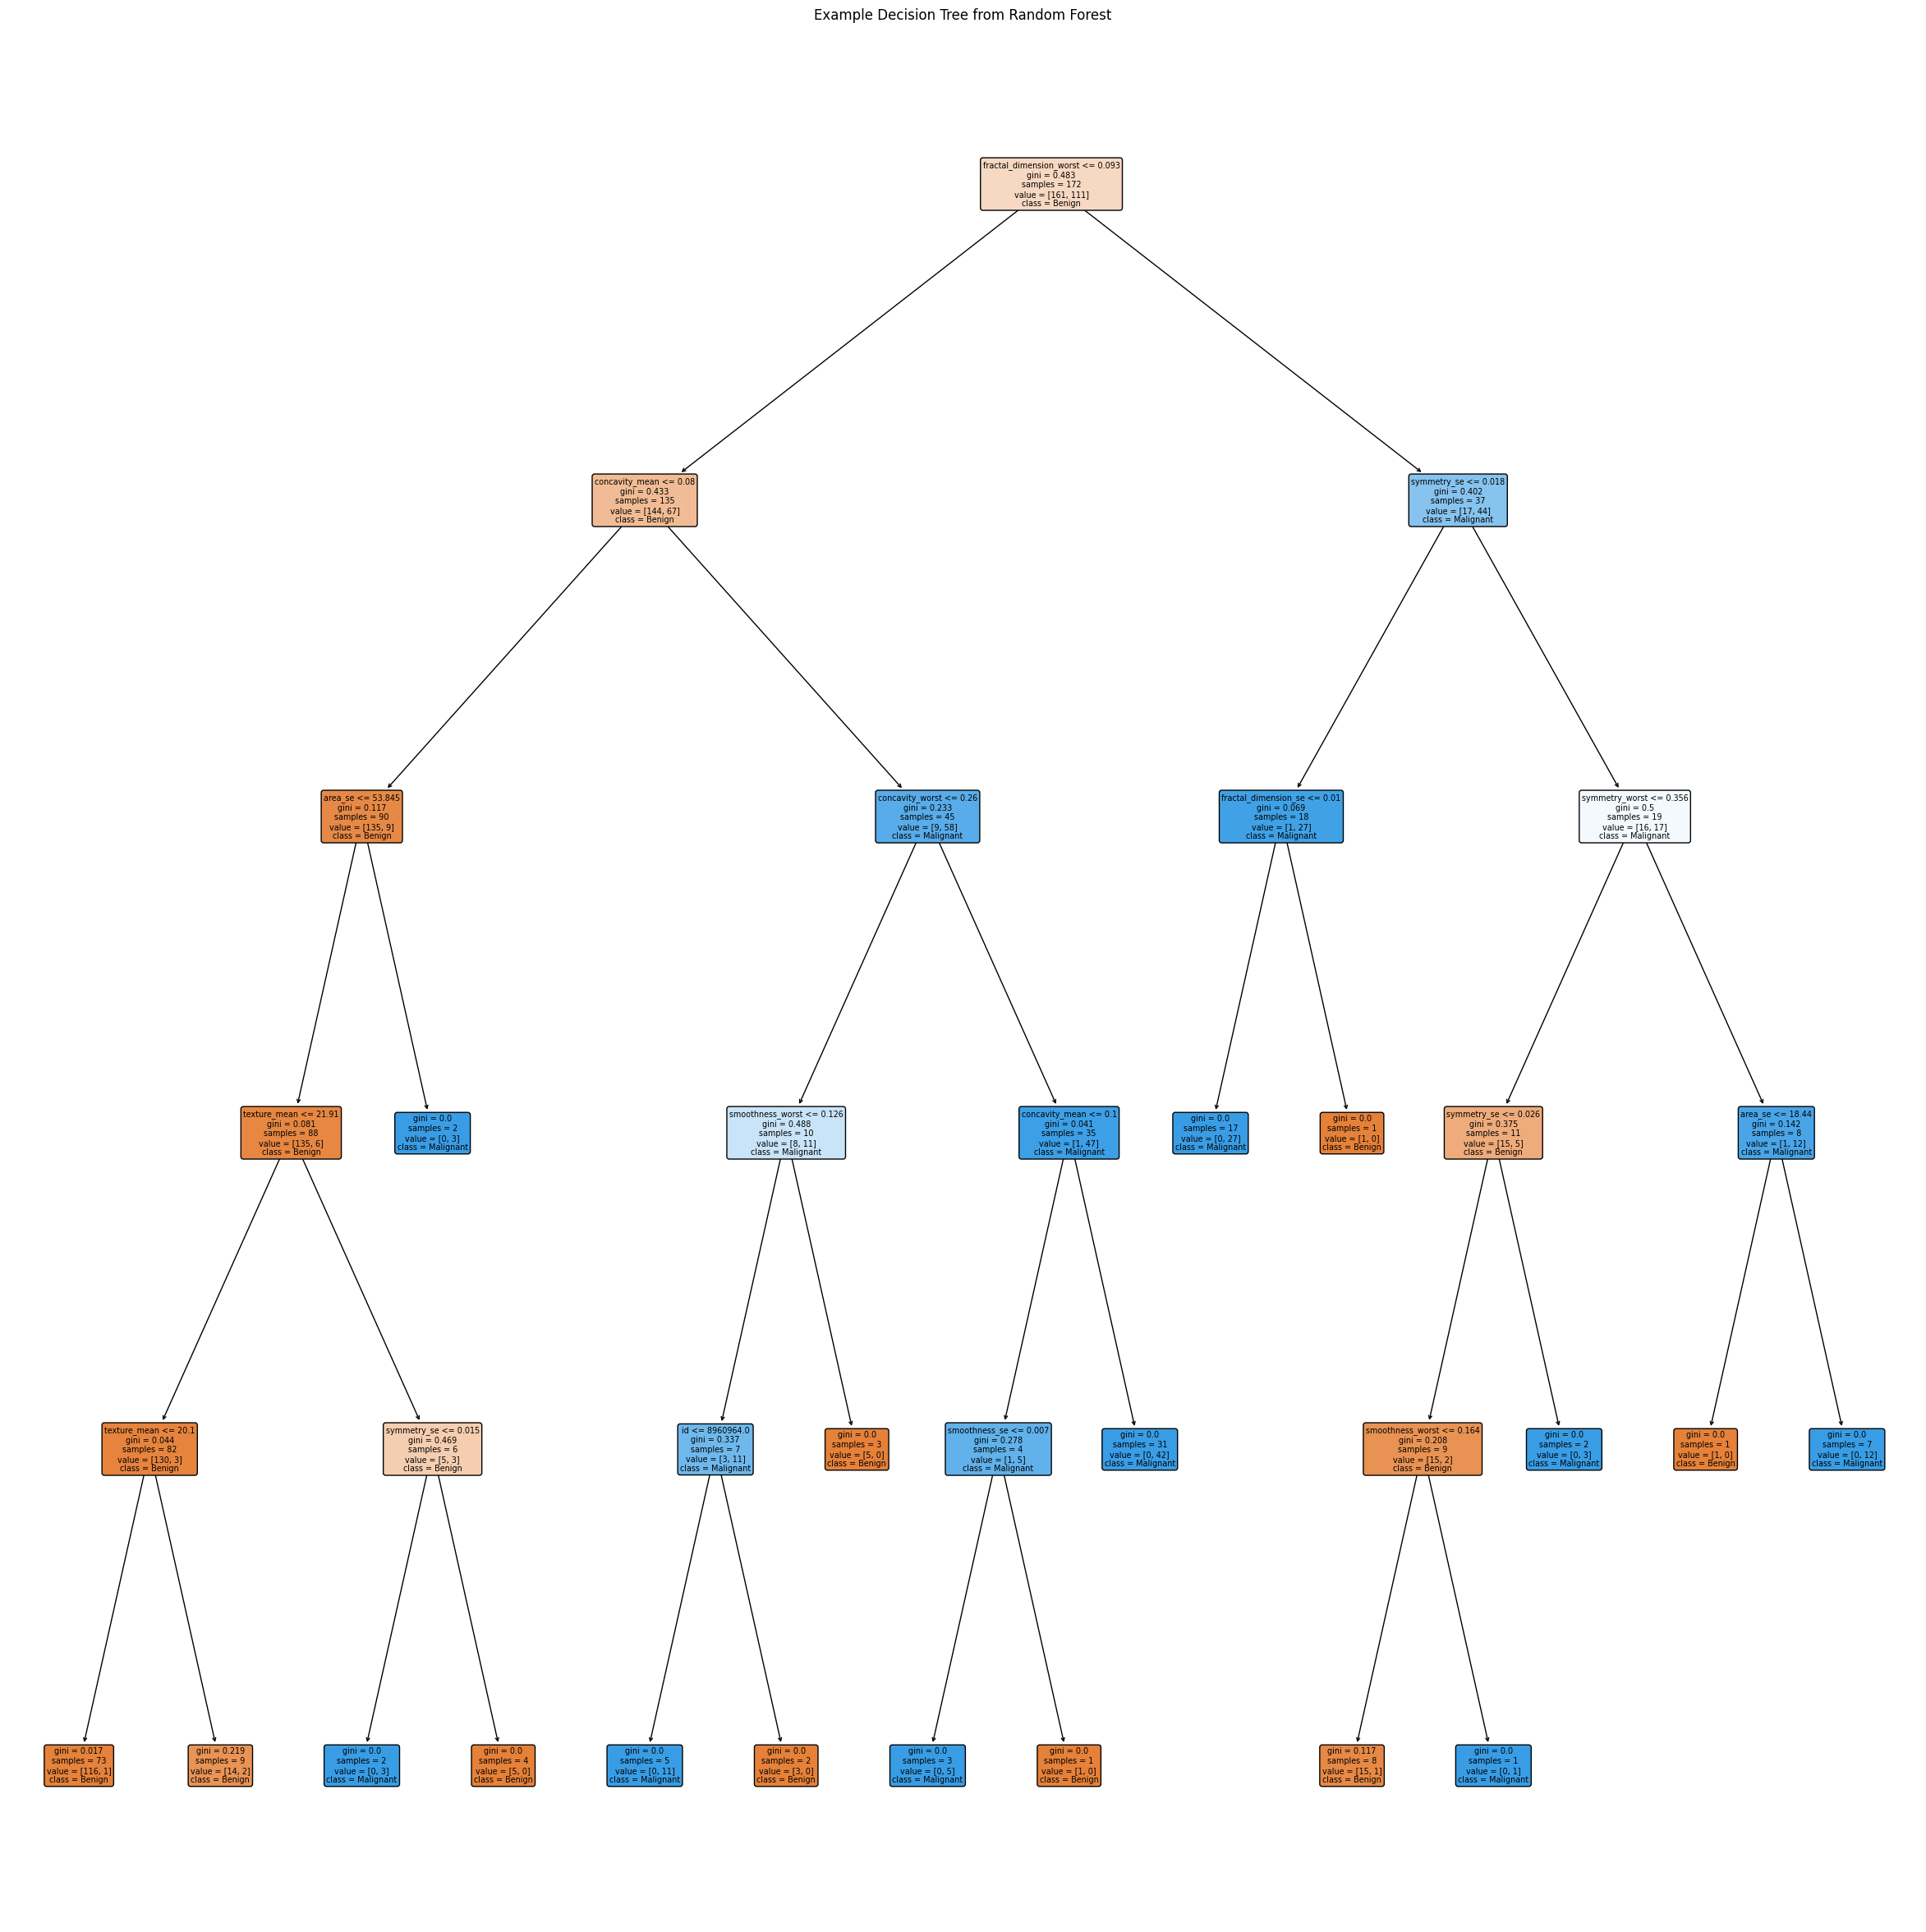

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create and fit a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

# Visualize one of the trees (e.g., the first tree in the forest)
plt.figure(figsize=(30, 30))
plot_tree(rfc.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Example Decision Tree from Random Forest")
plt.show()
plt.savefig('tree_visualization.jpg', dpi=300)

## Gradient Boosting Classifier

In [ ]:
# Define the hyperparameter grid to search over
param_grid_gbc = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

# Create the Gradient Boosting Classfier
gbc = GradientBoostingClassifier(random_state = 42)

# Use GridSearch to find the best hyperparameters
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_gbc.best_params_)

# Use the best hyperparameters to create a new Gradient Boosting Classfier
# gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
best_gbc = GradientBoostingClassifier(n_estimators=grid_search_gbc.best_params_['n_estimators'],
                                      learning_rate=grid_search_gbc.best_params_['learning_rate'],
                                      loss = grid_search_gbc.best_params_['loss'],
                                      random_state=42)

# Train the model on the training data
best_gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Best hyperparameters:  {'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 100}
Accuracy: 97.44%


In [ ]:
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("F1 score: {:.2f}%".format(f1 * 100))

F1 score: 97.39%


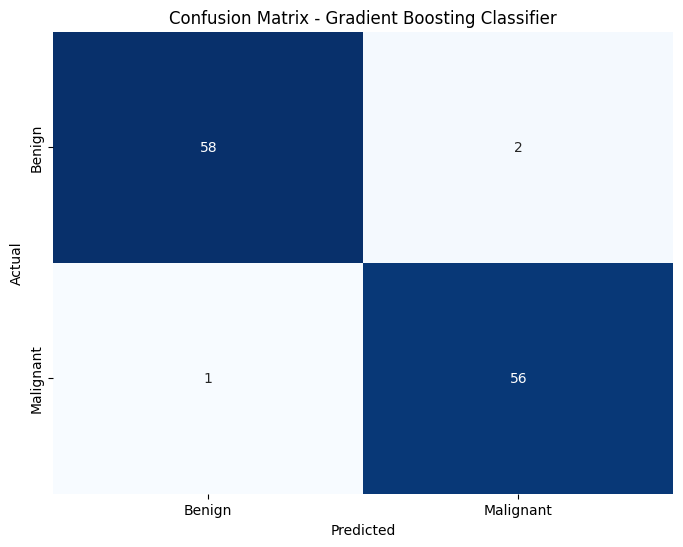

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test data
y_pred = best_gbc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

## Light BGM

In [ ]:
# Define the hyperparameter grid to search over
param_grid_lgbm = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'num_leaves': [10, 20, 30],
    'min_child_samples': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the LightGBM Classifier
lgbm = LGBMClassifier(random_state = 42)

# Use GridSearch to find the best hyperparameters
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv = 5, n_jobs = -1, verbose = 1)
grid_search_lgbm.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_lgbm.best_params_)

# Use the best hyperparameters to create a new LightGBM classifier
best_lgbm = LGBMClassifier(learning_rate = grid_search_lgbm.best_params_['learning_rate'],
                           n_estimators = grid_search_lgbm.best_params_['n_estimators'],
                           max_depth = grid_search_lgbm.best_params_['max_depth'],
                           num_leaves = grid_search_lgbm.best_params_['num_leaves'],
                           min_child_samples = grid_search_lgbm.best_params_['min_child_samples'],
                           subsample = grid_search_lgbm.best_params_['subsample'],
                           colsample_bytree = grid_search_lgbm.best_params_['colsample_bytree'],
                           random_state = 42)


# Train the model on the training data
best_lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_lgbm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[LightGBM] [Info] Number of positive: 113, number of negative: 159
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415441 -> initscore=-0.341516
[LightGBM] [Info] Start training from score -0.341516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("F1 score: {:.2f}%".format(f1 * 100))

F1 score: 98.25%


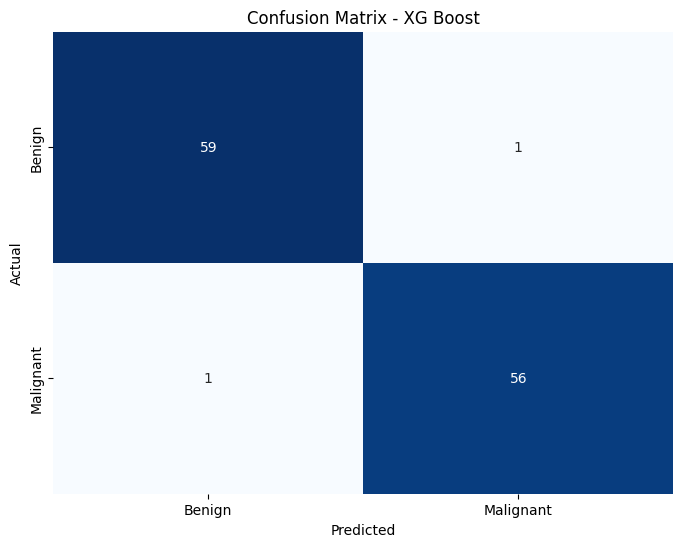

In [ ]:
# Make predictions on the test data
y_pred = best_lgbm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XG Boost")
plt.show()

## XG Boost

In [ ]:
# Define the hyperparameter grid to search over
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 150, 200],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBClassifier
xgb = XGBClassifier(random_state = 42)

# Use GridSearch to find the best hyperparameters
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv = 5, n_jobs = -1, verbose = 1)
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_xgb.best_params_)

# Use the best hyperparameters to create a new XGBClassifier
best_xgb = XGBClassifier(max_depth=grid_search_xgb.best_params_['max_depth'],
                         learning_rate=grid_search_xgb.best_params_['learning_rate'],
                         n_estimators=grid_search_xgb.best_params_['n_estimators'],
                         min_child_weight=grid_search_xgb.best_params_['min_child_weight'],
                         subsample=grid_search_xgb.best_params_['subsample'],
                         colsample_bytree=grid_search_xgb.best_params_['colsample_bytree'],
                         random_state=42)

# Train the model on the training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.6}
Accuracy: 98.29%


In [ ]:
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("F1 score: {:.2f}%".format(f1 * 100))


F1 score: 98.25%


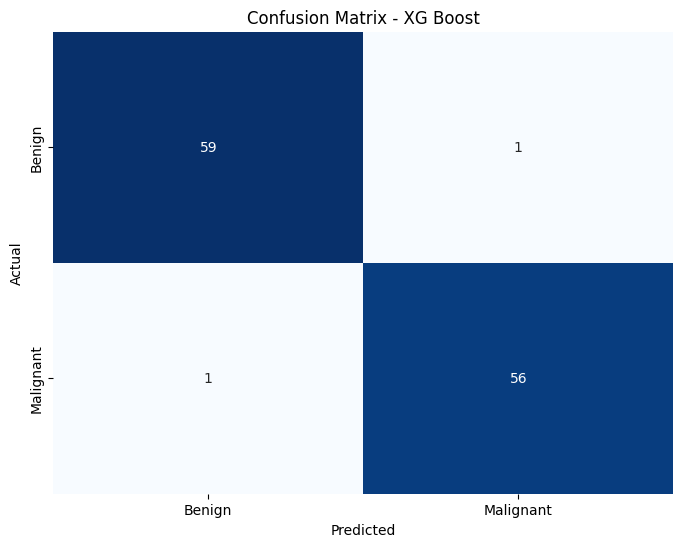

In [ ]:
# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XG Boost")
plt.show()

## Evaluation

In [ ]:
df1_test = df_test.copy()
df1_test = df1_test.drop(drop_list1,axis = 1)   # do not modify test_df1, we will use it later
df1_test.head()

,id,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,90312,23.21,1174.0,0.10100,0.18560,0.1989,0.05884,2.8360,70.10,0.011240,0.074690,0.02768,0.006240,0.1251,0.38290,0.2576,0.07602
1,90317302,12.22,321.6,0.09996,0.01923,0.1800,0.06569,0.5477,11.88,0.005682,0.008496,0.01938,0.002371,0.1343,0.08615,0.2937,0.07722
2,903483,16.84,234.3,0.10390,0.00000,0.1985,0.07098,2.0790,28.85,0.015820,0.000000,0.01865,0.006736,0.1460,0.00000,0.2445,0.08865
3,903507,19.97,744.7,0.11600,0.18910,0.1929,0.06744,1.3310,66.91,0.007269,0.049720,0.01852,0.004232,0.1681,0.55530,0.3187,0.10190
4,903516,22.28,1407.0,0.11670,0.28100,0.2162,0.06606,0.9209,80.99,0.005215,0.047180,0.02045,0.004028,0.1502,0.70530,0.3828,0.10070


In [ ]:
df1_test.shape

(180, 17)

In [ ]:
df1_test.columns

Index(['id', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [ ]:
prediction = best_xgb.predict(df1_test)
len(prediction)

180

In [ ]:
# make submission
submission = pd.DataFrame({'id':df1_test['id'], 'diagnosis':prediction})
submission['diagnosis'] = submission['diagnosis'].map({0:'B',1:'M'})
submission.to_csv('submission.csv', index=False)


In [ ]:
submission.head()

,id,diagnosis
0,90312,M
1,90317302,B
2,903483,B
3,903507,M
4,903516,M
